In [59]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler

from fastai.tabular import *
from fastai import *

In [6]:
df = pd.read_csv('./data.csv')

In [7]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [8]:
df.rename(columns={'Unnamed: 0':'patient_time_slice'}, inplace=True)

In [9]:
df.head()

,patient_time_slice,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, patient_time_slice to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [11]:
df.sort_values(by='patient_time_slice')

,patient_time_slice,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
9065,X1.V1,12,22,35,45,69,74,79,78,66,...,-18,-32,-47,-53,-48,-40,-17,-23,-32,5
1705,X1.V1.1,-56,-50,-64,-91,-135,-140,-134,-114,-115,...,-72,-68,-85,-99,-111,-88,-84,-91,-96,5
9229,X1.V1.10,14,25,31,36,33,33,27,27,21,...,15,9,-5,-20,-32,-12,2,18,31,5
5276,X1.V1.101,-159,-176,-174,-145,-101,-45,0,29,15,...,-58,-93,-108,-101,-86,-66,-34,34,139,4
8192,X1.V1.102,34,31,29,19,16,12,3,-1,-5,...,-8,-13,-15,-14,-12,-7,-12,-9,-12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,X9.V1.994,126,197,272,370,414,422,405,398,361,...,-218,-198,-162,-141,-121,-119,-146,-181,-285,1
2238,X9.V11,-50,-43,-37,-46,-75,-84,-79,-54,-28,...,100,91,65,14,-13,-36,-40,-19,17,4
2546,X9.V12,-14,-24,-31,-41,-43,-41,-40,-39,-52,...,-7,-7,-9,-8,-6,-14,-15,-23,-35,3
8056,X9.V13,95,96,99,90,84,76,73,73,75,...,14,24,26,34,33,32,36,31,35,2


In [12]:
df[df.patient_time_slice.str.contains('.+\.20$')]

,patient_time_slice,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
813,X9.V1.20,1,11,3,-2,-2,-8,-2,0,2,...,-11,-23,-36,-46,-39,-31,-38,-39,-29,5
1299,X1.V1.20,-58,-59,-60,-52,-47,-44,-38,-41,-48,...,-24,-22,-18,-22,-10,6,12,0,-2,5
2123,X7.V1.20,-16,-9,17,31,47,47,30,3,-17,...,-10,-12,-15,-8,3,2,10,16,10,5
2147,X14.V1.20,38,37,45,43,42,42,45,39,23,...,-40,-40,-41,-21,-2,6,11,14,14,5
2281,X10.V1.20,-18,-9,-2,-6,-23,-40,-55,-60,-64,...,53,48,37,28,29,18,14,10,8,5
2465,X16.V1.20,-8,-9,-13,-9,-5,-2,-10,-10,-13,...,18,15,15,15,18,19,22,16,12,5
2852,X8.V1.20,8,10,0,3,16,21,27,23,27,...,13,18,17,21,11,4,-4,-16,-10,5
2914,X18.V1.20,-38,-28,-1,15,19,5,-8,-34,-44,...,-21,-27,-48,-56,-61,-53,-40,-16,6,5
3532,X3.V1.20,-17,-16,-11,2,-3,-6,-17,-33,-31,...,-44,-43,-34,-18,-21,-26,-30,-18,-16,5
4844,X20.V1.20,-36,-54,-58,-45,-31,-20,-24,-17,-20,...,-60,-59,-54,-50,-40,-37,-42,-50,-59,5


### X1-X23 indicates second interval, not sure about V1 yet. Last digits represent patient.

In [13]:
df[df.patient_time_slice.str.contains('.+\.134$')]

,patient_time_slice,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
22,X11.V1.134,-264,-189,-117,-45,20,70,111,143,161,...,-231,-221,-248,-321,-444,-530,-548,-536,-486,1
58,X21.V1.134,143,134,124,112,94,65,25,-12,-48,...,12,35,43,45,27,9,-14,-38,-63,1
651,X2.V1.134,-25,-25,-27,-30,-38,-40,-48,-52,-48,...,-50,-24,-4,8,20,19,27,25,19,1
4232,X9.V1.134,106,120,139,146,154,154,150,136,120,...,-15,-11,-23,-34,-31,-24,-41,-99,-162,1
4425,X22.V1.134,-89,-103,-106,-82,-43,-3,37,65,82,...,253,195,54,-156,-299,-305,-151,35,88,1
4753,X13.V1.134,-217,-193,-129,-71,-18,32,79,116,143,...,-5,-11,-21,-38,-52,-70,-94,-128,-166,1
5709,X19.V1.134,-62,-65,-74,-84,-107,-136,-160,-170,-169,...,-32,-27,-8,14,24,19,4,4,17,1
5723,X8.V1.134,-200,-194,-149,-117,-96,-82,-85,-89,-107,...,-80,-47,-15,3,23,39,58,76,89,1
5848,X12.V1.134,-430,-362,-284,-219,-156,-106,-57,-20,4,...,22,39,29,14,20,34,14,-72,-168,1
6458,X4.V1.134,48,44,39,35,24,16,3,-5,-18,...,74,64,16,-55,-125,-157,-144,-112,-90,1


In [14]:
df[df.y == 1]

,patient_time_slice,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
11,X21.V1.724,-167,-230,-280,-315,-338,-369,-405,-392,-298,...,423,434,416,374,319,268,215,165,103,1
20,X23.V1.964,410,451,491,541,581,641,736,757,692,...,415,428,463,510,562,607,667,748,763,1
22,X11.V1.134,-264,-189,-117,-45,20,70,111,143,161,...,-231,-221,-248,-321,-444,-530,-548,-536,-486,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11487,X17.V1.874,98,107,121,143,166,184,185,174,153,...,-31,11,48,77,95,107,111,110,119,1
11488,X20.V1.494,267,409,450,416,334,248,173,113,67,...,413,288,173,76,7,-27,-46,-58,-67,1
11490,X14.V1.404,-22,-64,-121,-201,-292,-336,-398,-527,-773,...,183,-152,-499,-577,-415,-223,-88,-18,-61,1
11492,X13.V1.624,-27,-53,-84,-104,-131,-171,-199,-203,-177,...,-127,-114,-99,-79,-56,-28,-14,-8,-12,1


### is it possible to classify a seizure based on eeg readings taken before patient has had seizure. Predicting an eminent seizure..?

### It seems patients having seizures only have eeg readings recorded while a seizure is occurring. Not before.

### So i'll just focus on classification of eeg seizure activity. Patient time slice feature is not needed in that case.

In [15]:
df_anon = df.drop(['patient_time_slice'],axis=1)

In [16]:
df_anon.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


### This will be a Binary Class problem so will change all target values to 0 unless 1

In [17]:
df_anon['y'] = df_anon['y'].apply(lambda x: 0 if x!=1 else x)

In [18]:
df_anon.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [19]:
df_anon.y.value_counts(normalize=True)

0    0.8
1    0.2
Name: y, dtype: float64

In [20]:
df_anon.to_csv('./seizure_data_no_patient.csv',index=False)

### No surprise with the class imbalance after changing to binary. I'll explore some imputation methods 

### Going to try my Deep RL environment to deal with the class imbalance just out of curiosity

### According to this paper Blagus, R., Lusa, L. SMOTE for high-dimensional class-imbalanced data. BMC Bioinformatics 14, 106 (2013). https://doi.org/10.1186/1471-2105-14-106

### SMOTE is only an improvement over undersampling when using KNN

### So ill try SMOTE with that and use undersampling for all other classification approaches

In [21]:
X = df_anon.drop('y',axis=1)
y = df_anon.y

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 178 entries, X1 to X178
dtypes: int64(178)
memory usage: 15.6 MB


In [23]:
y

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: y, Length: 11500, dtype: int64

### creating a test set before SMOTE in order to test model on data that hasn't been fiddled with

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [25]:
sm = SMOTE()

In [26]:
X_smote, y_smote = sm.fit_resample(X_train,y_train)

C:\Users\Jacob\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
len(X_smote)

14758

In [28]:
print(Counter(y_smote))

Counter({0: 7379, 1: 7379})


### Trying some traditional classification approaches 

In [29]:
knn = KNeighborsClassifier()

In [30]:
knn.fit(X_smote,y_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
knn.score(X_test,y_test)

0.957391304347826

In [32]:
y_pred = knn.predict(X_test)

In [33]:
clasif_report = classification_report(y_test,y_pred)

In [34]:
print(clasif_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1821
           1       0.98      0.81      0.89       479

    accuracy                           0.96      2300
   macro avg       0.97      0.90      0.93      2300
weighted avg       0.96      0.96      0.96      2300



In [72]:
con_matrix = confusion_matrix(y_test,y_pred,normalize='true')

In [73]:
print(con_matrix)

[[0.995058 0.004942]
 [0.185804 0.814196]]


In [37]:
u_sampler = RandomUnderSampler()

In [38]:
X_under_s, y_under_s = u_sampler.fit_resample(X_train, y_train)

C:\Users\Jacob\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [39]:
print(Counter(y_under_s))

Counter({0: 1821, 1: 1821})


In [40]:
log_reg = LogisticRegressionCV(max_iter=100000)

In [41]:
log_reg.fit(X_under_s,y_under_s)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [42]:
log_reg.score(X_test,y_test)

0.6660869565217391

In [43]:
y_pred_log = log_reg.predict(X_test)

In [44]:
log_cf = classification_report(y_test,y_pred_log)

In [45]:
print(log_cf)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1821
           1       0.29      0.41      0.34       479

    accuracy                           0.67      2300
   macro avg       0.56      0.57      0.56      2300
weighted avg       0.71      0.67      0.69      2300



### Going to setup a Neural Network using fastai and see what happens

In [54]:
valid_idx = range(len(df_anon)-2000, len(df_anon))

In [55]:
data = TabularDataBunch.from_df(path='./seizure_data_no_patient.csv',df=df_anon,dep_var='y',procs=Normalize,valid_idx=valid_idx)

In [61]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.161728,0.132394,0.957500,00:43
1,0.117984,0.109101,0.952000,00:45
2,0.092200,0.101485,0.959500,00:43
3,0.069050,0.100708,0.962500,00:42


In [67]:
interp = ClassificationInterpretation.from_learner(learn)

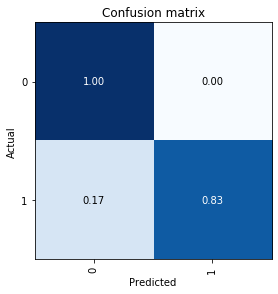

In [74]:
interp.plot_confusion_matrix(normalize=True)

### So a Neural Network with no imputation done on the data is not only more accurate overall it produces less false positives than the KNN model with SMOTE which is somewhat unexpected.